# Worldwide COVID-19 Spread and Economic Indicators
## DS 2500: Intermediate Programming with Data
### By: Robert Hyland, Omeed Golkaryeh, Jonathan Volfson, and Rikin Kamdar

## Introduction

The COVID-19 pandemic has ravaged the world in unprecedented ways. The rapid onset of the pandemic and ease of transmission placed countries in a difficult position, wherein responses had to be swift and widespread. Over a year into the pandemic, and with vaccinations happening every day, it is important to reflect on the development of the pandemic and the ways in which it has impacted people across the world. 

The purpose of this project is to implement visualizations to better understand the impact of COVID-19 globally. By using data sources that cover a variety of measures from COVID deaths to vaccination rates, we hope to gain a better understanding of the impact of COVID. After generating visualizations related to the pandemic, we aim to integrate certain economic measures to see if they're related individual countries' responses to the pandemic. Economic prosperity is often viewed as a measure of a country's health, and as such this project aims to see if measures of economic prosperity (and, conversely, economic inequality) can adequately account for the impact of COVID, as well as the efficacy of country responses. 

## Data Sources and Methods
Most of the data has been derived from the open-source compendium "Our World in Data" found on Github [1]. This dataset is offered in csv format, and covers several variables that measure individual countries' COVID impact. The dataset is refreshed daily, meaning the data used in this project is refreshed up to April 20, 2021. As the data is in csv format, we read the data in via its URL into a dataframe using pandas. Data cleaning involved dropping certain NaN values, as well as reformatting the date column using pd.to_datetime to ensure uniformity. 

A secondary dataset is used to import a measure of economic inequality, the gini coefficient (described in further detail below). This dataset is also available in csv format, from the WorldBank website [2]. The WorldBank operates a database where users can select certain economic indicators for a set time range, as well as for specific countries. For the purposes of this project, we selected the gini coefficient for the time period 1974-2018. 

## Utilizing Geopandas to Visualize the Impact of Covid

For this section, Geopandas is utilized to generate a series of visualizations that display the total deaths per million in a country. The function make_map utilizes geopandas to create visualizations in a series of steps. First, the dataframe is sliced to only contain the specified date. The dataframe is then merged with a geopandas world dataframe according to country codes. Geopandas then has a visualization function where the specified column can be used to color individual countries on a map.

In [1]:
import geopandas as gpd
import numpy as np
import pandas as pd
import seaborn as sns
from datetime import datetime as dt
from datetime import datetime, timedelta
import matplotlib.pyplot as plt
import scipy.stats

url = 'https://covid.ourworldindata.org/data/owid-covid-data.csv'
data = pd.read_csv(url)
data = data.dropna(subset=['continent'])
data['date'] = pd.to_datetime(data['date'], format='%Y-%m-%d')
data = data.rename(columns={'iso_code': 'iso_a3'})
data

,iso_a3,continent,location,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,...,gdp_per_capita,extreme_poverty,cardiovasc_death_rate,diabetes_prevalence,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index
0,AFG,Asia,Afghanistan,2020-02-24,1.0,1.0,NaN,NaN,NaN,NaN,...,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83,0.511
1,AFG,Asia,Afghanistan,2020-02-25,1.0,0.0,NaN,NaN,NaN,NaN,...,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83,0.511
2,AFG,Asia,Afghanistan,2020-02-26,1.0,0.0,NaN,NaN,NaN,NaN,...,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83,0.511
3,AFG,Asia,Afghanistan,2020-02-27,1.0,0.0,NaN,NaN,NaN,NaN,...,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83,0.511
4,AFG,Asia,Afghanistan,2020-02-28,1.0,0.0,NaN,NaN,NaN,NaN,...,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83,0.511
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
82984,ZWE,Africa,Zimbabwe,2021-04-16,37534.0,112.0,55.286,1551.0,1.0,2.286,...,1899.775,21.4,307.846,1.82,1.6,30.7,36.791,1.7,61.49,0.571
82985,ZWE,Africa,Zimbabwe,2021-04-17,37699.0,165.0,60.857,1552.0,1.0,2.000,...,1899.775,21.4,307.846,1.82,1.6,30.7,36.791,1.7,61.49,0.571
82986,ZWE,Africa,Zimbabwe,2021-04-18,37751.0,52.0,66.143,1553.0,1.0,2.143,...,1899.775,21.4,307.846,1.82,1.6,30.7,36.791,1.7,61.49,0.571
82987,ZWE,Africa,Zimbabwe,2021-04-19,37859.0,108.0,78.857,1553.0,0.0,1.571,...,1899.775,21.4,307.846,1.82,1.6,30.7,36.791,1.7,61.49,0.571


In [2]:
world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))
world

,pop_est,continent,name,iso_a3,gdp_md_est,geometry
0,920938,Oceania,Fiji,FJI,8374.0,"MULTIPOLYGON (((180.00000 -16.06713, 180.00000..."
1,53950935,Africa,Tanzania,TZA,150600.0,"POLYGON ((33.90371 -0.95000, 34.07262 -1.05982..."
2,603253,Africa,W. Sahara,ESH,906.5,"POLYGON ((-8.66559 27.65643, -8.66512 27.58948..."
3,35623680,North America,Canada,CAN,1674000.0,"MULTIPOLYGON (((-122.84000 49.00000, -122.9742..."
4,326625791,North America,United States of America,USA,18560000.0,"MULTIPOLYGON (((-122.84000 49.00000, -120.0000..."
...,...,...,...,...,...,...
172,7111024,Europe,Serbia,SRB,101800.0,"POLYGON ((18.82982 45.90887, 18.82984 45.90888..."
173,642550,Europe,Montenegro,MNE,10610.0,"POLYGON ((20.07070 42.58863, 19.80161 42.50009..."
174,1895250,Europe,Kosovo,-99,18490.0,"POLYGON ((20.59025 41.85541, 20.52295 42.21787..."
175,1218208,North America,Trinidad and Tobago,TTO,43570.0,"POLYGON ((-61.68000 10.76000, -61.10500 10.890..."


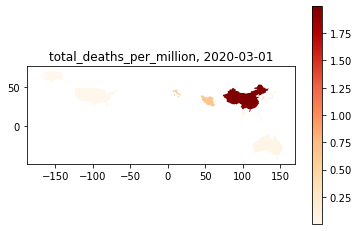

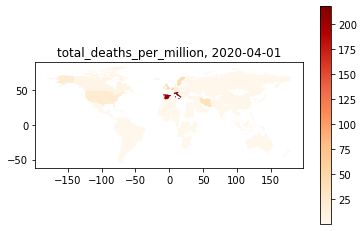

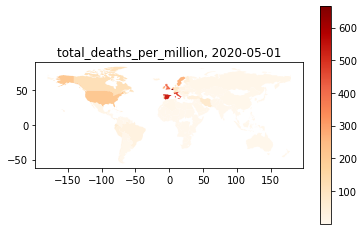

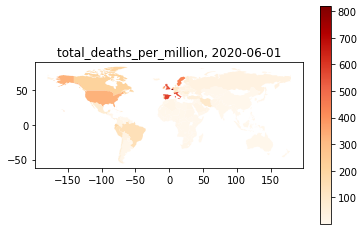

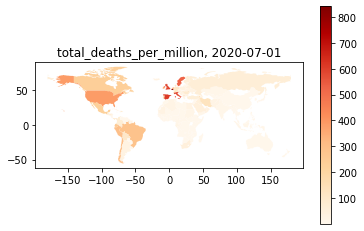

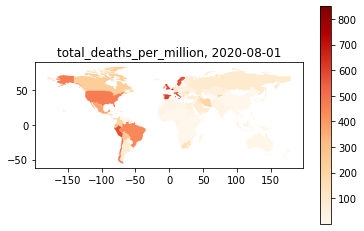

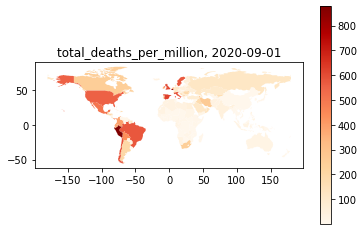

In [3]:
def make_map(data, date, parameter):
    world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))
    subdata = data[(data.date == date)]
    new_df = pd.merge(world, subdata, on='iso_a3')
    new_df.plot(column = parameter, legend=True, cmap='OrRd')
    plt.title(f'{parameter}, {date}')
    plt.savefig(f'{date}.png')
dates1 = ['2020-03-01', '2020-04-01', '2020-05-01', '2020-06-01', '2020-07-01', '2020-08-01', '2020-09-01']
dates2 = ['2020-10-01', '2020-11-01', '2020-12-01', '2021-01-01', '2021-02-01', '2021-03-01', '2021-04-01']
for date in dates1:
    make_map(data, date, 'total_deaths_per_million')

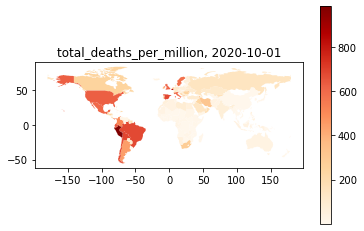

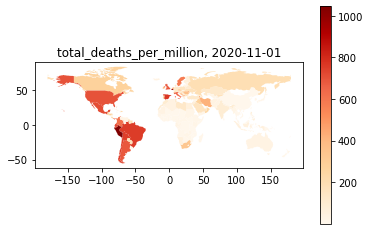

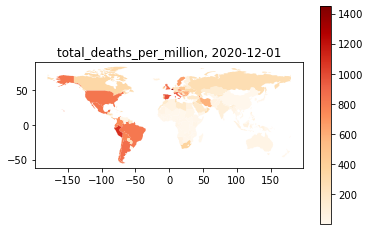

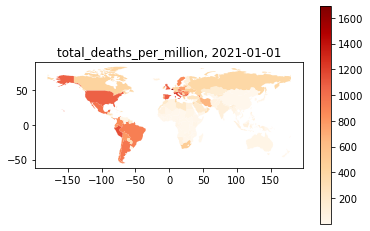

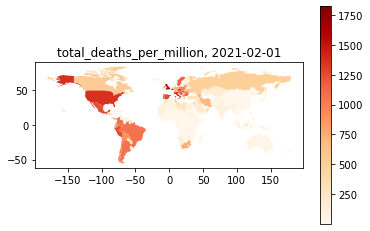

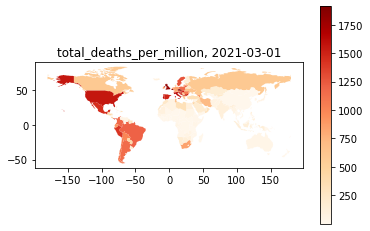

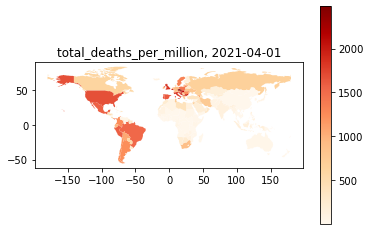

In [4]:
for date in dates2:
    make_map(data, date, 'total_deaths_per_million')

## Turning Geopandas Visualizations into Gifs:
Converting the above visualizations into a single gif. Note: this was done using a terminal command prompt that [can be found here.](https://towardsdatascience.com/how-to-make-a-gif-map-using-python-geopandas-and-matplotlib-cd8827cefbc8)

![SegmentLocal](map3.gif "segment")

In [5]:
#top 15/bottom 15 vaccinated countries
#data is added every day but we pull the data from 10 days ago since there were some errors with going sooner than messed up the visualizations (data not fully updated to present)
todays_date = (datetime.today() - timedelta(days=10)).strftime('%Y-%m-%d')
df_hc_to_date = data.loc[data['date'] == todays_date]

# this df contains all information for each country that was updated 10 days ago
df_hc_to_date

,iso_a3,continent,location,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,...,gdp_per_capita,extreme_poverty,cardiovasc_death_rate,diabetes_prevalence,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index
412,AFG,Asia,Afghanistan,2021-04-11,57160.0,16.0,69.143,2521.0,0.0,3.429,...,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.50,64.83,0.511
1266,ALB,Europe,Albania,2021-04-11,128393.0,238.0,266.000,2317.0,7.0,7.429,...,11803.431,1.1,304.195,10.08,7.1,51.2,NaN,2.89,78.57,0.795
1687,DZA,Africa,Algeria,2021-04-11,118516.0,138.0,127.714,3130.0,4.0,3.571,...,13913.839,0.5,278.364,6.73,0.7,30.4,83.741,1.90,76.88,0.748
2102,AND,Europe,Andorra,2021-04-11,12545.0,48.0,44.857,120.0,0.0,0.429,...,NaN,NaN,109.135,7.97,29.0,37.8,NaN,NaN,83.73,0.868
2499,AGO,Africa,Angola,2021-04-11,23457.0,126.0,118.000,553.0,3.0,1.571,...,5819.495,NaN,276.045,3.94,NaN,NaN,26.664,NaN,61.15,0.581
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
80898,VEN,South America,Venezuela,2021-04-11,174887.0,1101.0,1252.000,1778.0,19.0,16.571,...,16745.022,NaN,204.850,6.47,NaN,NaN,NaN,0.80,72.06,0.711
81352,VNM,Asia,Vietnam,2021-04-11,2693.0,1.0,8.857,35.0,0.0,0.000,...,6171.884,2.0,245.465,6.00,1.0,45.9,85.847,2.60,75.40,0.704
82183,YEM,Asia,Yemen,2021-04-11,5357.0,81.0,79.857,1049.0,18.0,14.714,...,1479.147,18.8,495.003,5.35,7.6,29.2,49.542,0.70,66.12,0.470
82582,ZMB,Africa,Zambia,2021-04-11,90029.0,111.0,157.000,1226.0,0.0,0.857,...,3689.251,57.5,234.499,3.94,3.1,24.7,13.938,2.00,63.89,0.584


In [6]:
# grab the top 15 most vaccinated countries
df_top_15_most_vaccinated = df_hc_to_date.sort_values(['people_vaccinated'], ascending=False).head(15)
df_top_15_most_vaccinated

# looks like the US and India are way further ahead than all other countries in terms of vaccinating their populations although India is not that high given their population is >5x the US's.
# Still surprising to see that they've gotten access to so many vaccines.

,iso_a3,continent,location,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,...,gdp_per_capita,extreme_poverty,cardiovasc_death_rate,diabetes_prevalence,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index
79116,USA,North America,United States,2021-04-11,31197877.0,46380.0,69821.714,562229.0,286.0,972.143,...,54225.446,1.2,151.089,10.79,19.1,24.6,NaN,2.77,78.86,0.926
34549,IND,Asia,India,2021-04-11,13527717.0,168912.0,134092.857,170179.0,904.0,725.429,...,6426.674,21.2,282.280,10.39,1.9,20.6,59.550,0.53,69.66,0.645
78661,GBR,Europe,United Kingdom,2021-04-11,4384610.0,1730.0,1544.571,127331.0,7.0,36.143,...,39753.244,0.2,122.137,4.28,20.0,24.7,NaN,2.54,81.32,0.932
11035,BRA,South America,Brazil,2021-04-11,13482023.0,37017.0,71009.571,353137.0,1803.0,3100.571,...,14103.452,3.4,177.961,8.11,10.1,17.9,NaN,2.20,75.88,0.765
29218,DEU,Europe,Germany,2021-04-11,3012158.0,2706.0,16547.000,78500.0,98.0,205.714,...,45229.245,NaN,156.139,8.31,28.2,33.1,NaN,8.00,81.33,0.947
76878,TUR,Asia,Turkey,2021-04-11,3849011.0,50678.0,51708.714,33939.0,237.0,239.429,...,25129.341,0.2,171.285,12.13,14.1,41.1,NaN,2.81,77.69,0.820
27545,FRA,Europe,France,2021-04-11,5119585.0,117900.0,33773.000,98909.0,696.0,300.143,...,38605.671,NaN,86.060,4.77,30.1,35.6,NaN,5.98,82.66,0.901
48674,MEX,North America,Mexico,2021-04-11,2280213.0,1793.0,4250.714,209338.0,126.0,741.571,...,17336.469,2.5,152.783,13.06,6.9,21.4,87.847,1.38,75.05,0.779
37632,ITA,Europe,Italy,2021-04-11,3769814.0,15737.0,14507.143,114254.0,331.0,460.571,...,35220.084,2.0,113.151,4.78,19.8,27.8,NaN,3.18,83.51,0.892
61942,RUS,Europe,Russia,2021-04-11,4589209.0,8576.0,8519.000,101282.0,333.0,367.000,...,24765.954,0.1,431.297,6.18,23.4,58.3,NaN,8.05,72.58,0.824


Text(0.5, 1.0, 'Countries With Most Vaccinated Population')

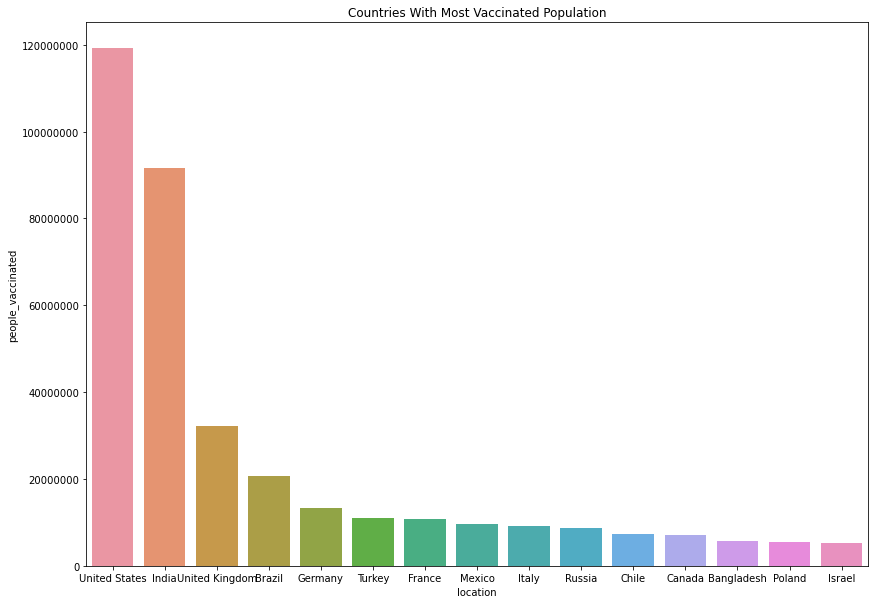

In [7]:
# Plot the 15 most vaccinated countries
fig, scatter = plt.subplots(figsize = (14,10))
plt.ticklabel_format(style='plain', axis='y')
sns.barplot(x="location", y="people_vaccinated", data=df_top_15_most_vaccinated).set_title('Countries With Most Vaccinated Population')

In [8]:
# Have to flatten the data to run a lineplot for vaccination progress
df_new = data[data['location'].apply(lambda x: x in df_top_15_most_vaccinated['location'].values.flatten())]
df_new

,iso_a3,continent,location,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,...,gdp_per_capita,extreme_poverty,cardiovasc_death_rate,diabetes_prevalence,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index
6440,BGD,Asia,Bangladesh,2020-03-03,NaN,NaN,NaN,NaN,NaN,NaN,...,3523.984,14.8,298.003,8.38,1.0,44.7,34.808,0.80,72.59,0.632
6441,BGD,Asia,Bangladesh,2020-03-04,NaN,NaN,NaN,NaN,NaN,NaN,...,3523.984,14.8,298.003,8.38,1.0,44.7,34.808,0.80,72.59,0.632
6442,BGD,Asia,Bangladesh,2020-03-05,NaN,NaN,NaN,NaN,NaN,NaN,...,3523.984,14.8,298.003,8.38,1.0,44.7,34.808,0.80,72.59,0.632
6443,BGD,Asia,Bangladesh,2020-03-06,NaN,NaN,NaN,NaN,NaN,NaN,...,3523.984,14.8,298.003,8.38,1.0,44.7,34.808,0.80,72.59,0.632
6444,BGD,Asia,Bangladesh,2020-03-07,NaN,NaN,NaN,NaN,NaN,NaN,...,3523.984,14.8,298.003,8.38,1.0,44.7,34.808,0.80,72.59,0.632
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
79121,USA,North America,United States,2021-04-16,31575640.0,79991.0,70096.857,566224.0,861.0,713.143,...,54225.446,1.2,151.089,10.79,19.1,24.6,NaN,2.77,78.86,0.926
79122,USA,North America,United States,2021-04-17,31628013.0,52373.0,68073.714,566904.0,680.0,708.714,...,54225.446,1.2,151.089,10.79,19.1,24.6,NaN,2.77,78.86,0.926
79123,USA,North America,United States,2021-04-18,31670031.0,42018.0,67450.571,567217.0,313.0,712.571,...,54225.446,1.2,151.089,10.79,19.1,24.6,NaN,2.77,78.86,0.926
79124,USA,North America,United States,2021-04-19,31737964.0,67933.0,67122.429,567694.0,477.0,714.000,...,54225.446,1.2,151.089,10.79,19.1,24.6,NaN,2.77,78.86,0.926


Text(0.5, 1.0, 'Vaccine Progress For 15 Countries With Most Vaccinated Population')

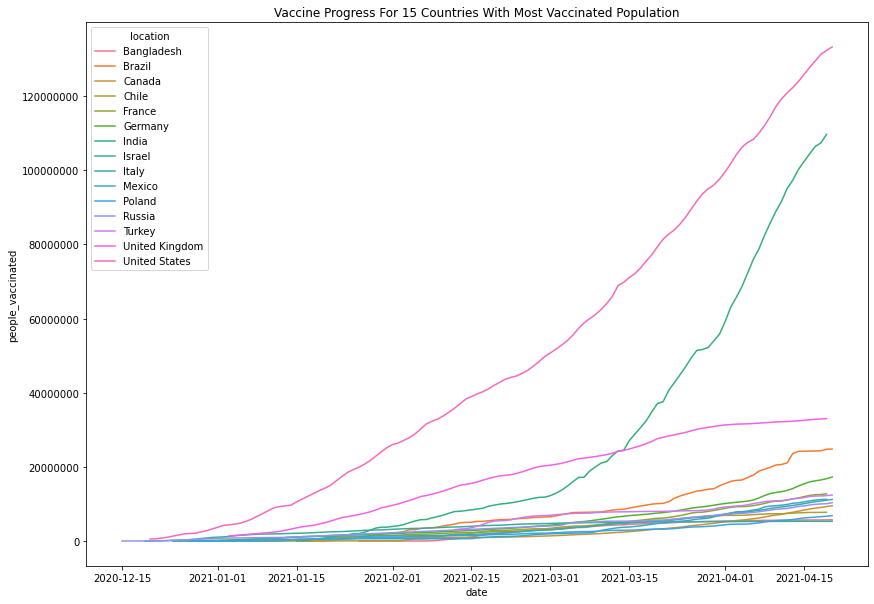

In [9]:
fig, scatter = plt.subplots(figsize = (14,10))
plt.ticklabel_format(style='plain', axis='y')
sns.lineplot(data=df_new, x='date', y='people_vaccinated', hue='location').set_title('Vaccine Progress For 15 Countries With Most Vaccinated Population')

Text(0.5, 1.0, 'People Vaccinated vs. Extreme Poverty Levels Per Country')

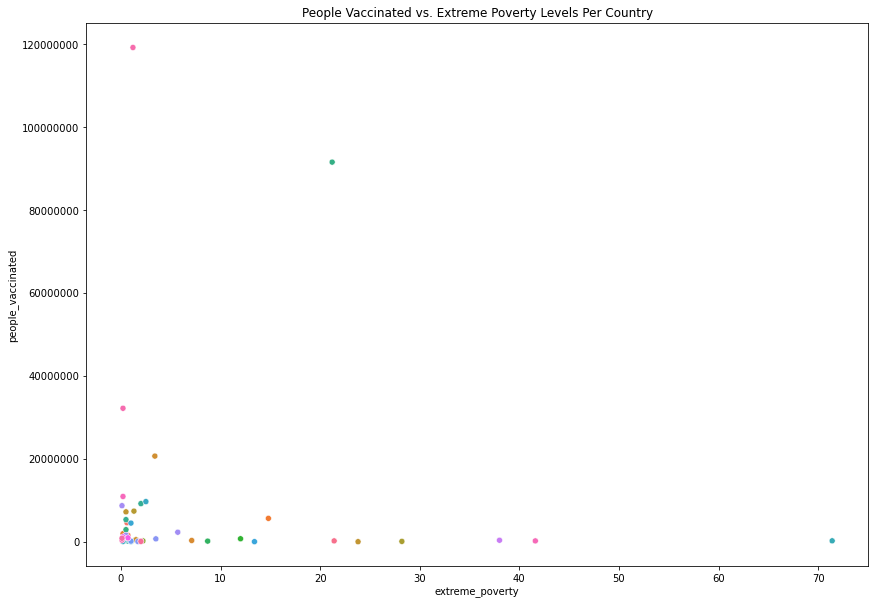

In [10]:
fig, scatter = plt.subplots(figsize = (14,10))
plt.ticklabel_format(style='plain', axis='y')
sns.scatterplot(data=df_hc_to_date, x='extreme_poverty', y='people_vaccinated', hue='location', legend=False).set_title('People Vaccinated vs. Extreme Poverty Levels Per Country')

In [11]:
df_poverty_and_vaccinations = df_hc_to_date[['extreme_poverty','people_vaccinated']].dropna()
scipy.stats.pearsonr(df_poverty_and_vaccinations['extreme_poverty'], df_poverty_and_vaccinations['people_vaccinated'])


(0.009079590798987257, 0.9475444326013971)

There doesn't appear to be a direct correlation between poverty levels and vaccine progress. There seems to be two trends where countries with higher levels of poverty have not been vaccinating heavily whereas countries with low poverty levels are making better progress with vaccinations. However, there is a big cluster around low vaccination progress/low poverty levels that could be explained by vaccine demand outgrowing vaccine supply or a country's population being overshadowed by those such as the US or India with much larger populations (future work could be to nromalize the data vs their population).

Now we're interested in looking at if there is any relationship between how many ICU patients a country has and whether that has affected their response to covid. While this would be a very hard thing to quantify/measure, we think that if a country had a lot more ICU patients (which implies more death due to serious cases) then they might push for a stronger vaccine rollout. This is what we will be looking for.

In [12]:
df_sum = data.groupby(['location']).sum()
df_sum.reset_index(inplace=True)
df_sum = df_sum.rename(columns = {'index':'location'})

df_sum_vaccinations = df_hc_to_date[['location', 'people_vaccinated']].dropna()

df_sum_icu_patients = df_sum[['location', 'icu_patients']]
df_sum_icu_patients = df_sum_icu_patients[df_sum_icu_patients['icu_patients'] != 0]
pd_sum_vaccines_and_icu_patients = pd.merge(df_sum_icu_patients, df_sum_vaccinations, on='location', how='inner')
pd_sum_vaccines_and_icu_patients

,location,icu_patients,people_vaccinated
0,Austria,86107.0,1502896.0
1,Belgium,180260.0,1928560.0
2,Bulgaria,81194.0,459409.0
3,Canada,161200.0,7198857.0
4,Czechia,215760.0,1381155.0
5,Denmark,12463.0,883162.0
6,Estonia,7377.0,259061.0
7,Finland,6556.0,1124365.0
8,France,1017978.0,10814693.0
9,Germany,829818.0,13323595.0


Text(0.5, 1.0, 'People Vaccinated vs. ICU Patients Per Country')

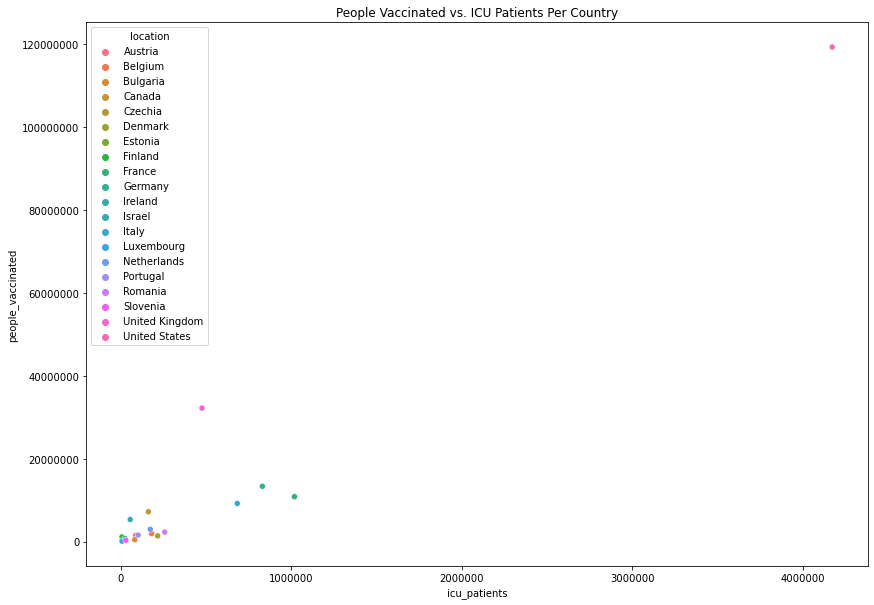

In [13]:
fig, scatter = plt.subplots(figsize = (14,10))
plt.ticklabel_format(style='plain', axis='y')
plt.ticklabel_format(style='plain', axis='x')
sns.scatterplot(data=pd_sum_vaccines_and_icu_patients, x='icu_patients', y='people_vaccinated', hue='location').set_title('People Vaccinated vs. ICU Patients Per Country')

## Identifying Relationships Between COVID and Economic Inequality

The following visualizations aim to elucidate any relationships that exist between the impact of COVID and existing levels of economic inequality across the globe. The following code combines two dataframes, the one used above that outlines COVID statistics, and a secondary dataframe that incorporates the Gini Index. The Gini Index is a measure used to quantify economic inequality in a country. Measured from 0-100, the closer a country's Gini Index is to 100, the more unequal the distribution of wealth is. The hope is to identify any correlation between the gini coefficient and any measures of COVID impact or preparedness within a country. 

In [14]:
econdf = pd.read_csv('https://raw.githubusercontent.com/jonvolfson/DS2500Project/main/econ_indicators.csv')
econdf.columns = ['year', 'year_code', 'country', 'iso_a3', 'gini', 'btm10_income', 'population']
econdf.drop(columns=['population'])
# keeping only the year with the most values for gini index
econdf = econdf[(econdf.year == '2016') & (econdf.gini != '..')]
econdf['gini'] = econdf['gini'].astype(float)
# creating a sub-dataframe for April 1, 2021
subdf = data[(data.date == '2021-04-01')]
mergedf = pd.merge(econdf, subdf, on='iso_a3')
mergedf

,year,year_code,country,iso_a3,gini,btm10_income,population_x,continent,location,date,...,gdp_per_capita,extreme_poverty,cardiovasc_death_rate,diabetes_prevalence,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index
0,2016,YR2016,Albania,ALB,33.7,3,2876101,Europe,Albania,2021-04-01,...,11803.431,1.1,304.195,10.08,7.1,51.2,NaN,2.89,78.57,0.795
1,2016,YR2016,Argentina,ARG,42.0,1.8,43590368,South America,Argentina,2021-04-01,...,18933.907,0.6,191.032,5.50,16.2,27.7,NaN,5.00,76.67,0.845
2,2016,YR2016,Armenia,ARM,32.5,3.3,2936146,Asia,Armenia,2021-04-01,...,8787.580,1.8,341.010,7.11,1.5,52.1,94.043,4.20,75.09,0.776
3,2016,YR2016,Austria,AUT,30.8,2.8,8736668,Europe,Austria,2021-04-01,...,45436.686,0.7,145.183,6.35,28.4,30.9,NaN,7.37,81.54,0.922
4,2016,YR2016,Bangladesh,BGD,32.4,3.7,157970840,Asia,Bangladesh,2021-04-01,...,3523.984,14.8,298.003,8.38,1.0,44.7,34.808,0.80,72.59,0.632
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
75,2016,YR2016,United Kingdom,GBR,34.8,2.8,65611593,Europe,United Kingdom,2021-04-01,...,39753.244,0.2,122.137,4.28,20.0,24.7,NaN,2.54,81.32,0.932
76,2016,YR2016,United States,USA,41.1,1.8,322941311,North America,United States,2021-04-01,...,54225.446,1.2,151.089,10.79,19.1,24.6,NaN,2.77,78.86,0.926
77,2016,YR2016,Uruguay,URY,39.7,2.2,3424132,South America,Uruguay,2021-04-01,...,20551.409,0.1,160.708,6.93,14.0,19.9,NaN,2.80,77.91,0.817
78,2016,YR2016,Vietnam,VNM,35.3,2.6,93638724,Asia,Vietnam,2021-04-01,...,6171.884,2.0,245.465,6.00,1.0,45.9,85.847,2.60,75.40,0.704


### Visualization One: Relating Percentage Vaccinated to GDP Per Capita
The first visualization relating COVID and economic data below aims to see if more "economically prosperous" countries--that is, countries with a higher GDP per capita--are vaccinating their populations at a higher rate. As indicated by the visualization below, there is a weak correlation between the two. The size of the points represents the size of the population to scaled down, indicating that high-population, high GDP per capita countries are to some extent vaccinating their populations at higher rates. 

Text(0, 0, 'Correlation: 0.33522943316380205')

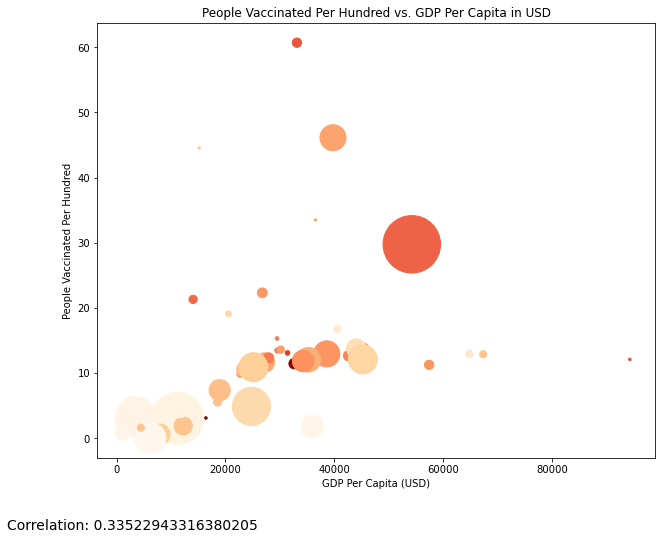

In [15]:
plt.figure(figsize=(10,8))
plt.scatter(mergedf['gdp_per_capita'], mergedf['people_vaccinated_per_hundred'], s=(mergedf['population_y']/100000), c=(mergedf['total_cases_per_million']), cmap='OrRd')
plt.title('People Vaccinated Per Hundred vs. GDP Per Capita in USD')
plt.xlabel('GDP Per Capita (USD)')
plt.ylabel('People Vaccinated Per Hundred')
corr = mergedf.corr()['gdp_per_capita']['people_vaccinated_per_hundred']
plt.figtext(0, 0, f'Correlation: {corr}', fontsize=14)

### Visualization Two: Comparing the Human Development Index and Total Cases Per Million
The results in this visualization were unexpected. The Human Development Index (HDI) is traditionally viewed as a measure of the potential and prosperity of a population, taking into consideration measures such as education, poverty, and healthcare. One would reasonably expect countries with higher Human Development Index values to perform better in light of the pandemic, though the data suggests otherwise. There is a considerable correlation of approximately .569 between the Human Development Index and total cases per million, suggesting that countries traditionally viewed as more prosperous are in fact performing more poorly during the pandemic.

Before making any major conclusions in this regard, it is important to note that this could likely be explained by a lack of data. Total cases per million is derived from local government reports, which often lag, and could be concealed for the sake of hiding actual the actual tolls of the pandemic. 

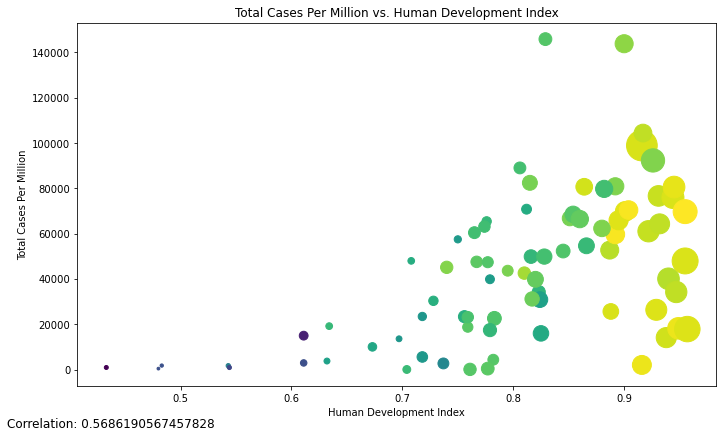

In [16]:
plt.figure(figsize=(10, 6))
plt.scatter(mergedf.human_development_index, mergedf.total_cases_per_million, s=(mergedf.gdp_per_capita/100), c=(mergedf.life_expectancy))
plt.title('Total Cases Per Million vs. Human Development Index')
plt.xlabel('Human Development Index')
plt.ylabel('Total Cases Per Million')
corr = mergedf.corr()['human_development_index']['total_cases_per_million']
plt.figtext(0, 0, f'Correlation: {corr}', fontsize=12)
plt.tight_layout()

### Visualization Three: Comparing Economic Inequality and Pandemic Preparedness
This visualization aims to see if the gini coefficient can be an adequate predictor of pandemic preparedness. For this visualization, pandemic preparedness is defined as hospital beds per thousand people within a country. As the data shows, there is a negative correlation between the two variables, indicating that as economic (or wealth) inequality increases, the number of hospital beds per thousand decreases. While causality cannot be inferred, it is intuitive that countries with high levels of economic inequality are less equipped in terms of resources to adequately provide care for citizens.

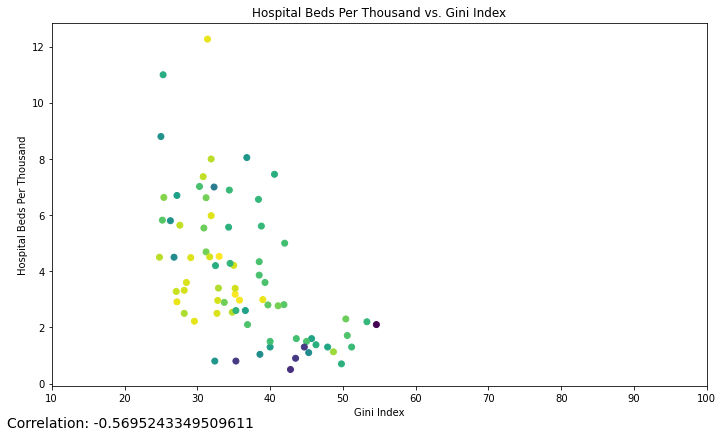

In [17]:
plt.figure(figsize=(10,6))
plt.scatter(mergedf.gini, mergedf.hospital_beds_per_thousand, c=(mergedf.life_expectancy))
plt.title('Hospital Beds Per Thousand vs. Gini Index')
plt.xlabel('Gini Index')
plt.ylabel('Hospital Beds Per Thousand')
plt.xticks([10, 20, 30, 40, 50, 60, 70, 80, 90, 100])
corr = mergedf.corr()['gini']['hospital_beds_per_thousand']
plt.figtext(0, 0, f'Correlation: {corr}', fontsize=14)
plt.tight_layout()

In [18]:
def quantile_group(df, col_name):
    '''Creates a new column in the DataFrame that splits countries into four quantiles
    Args:
        df (DataFrame), covid dataframe
        col_name (str), select a column name to split into quantiles
    Returns:
        hdi_df (DataFrame), new dataframe with new categorized column'''
    
    labels = ['Low: 0 - 25th Percentile','Medium: 25th - 50th Percentile','High: 50th - 75th Percentile','Very High: 75th - 100th Percentile']
    
    # splits dataframe into quartiles by column
    quartiles = pd.qcut(data[col_name], 4, labels = labels)
    group_lst = quartiles.to_list()
    
    # adds new column to df      
    df[f'{col_name}_Group'] = group_lst
    
    return df

In [19]:
hdi_df = quantile_group(data, 'human_development_index')

In [20]:
def group_plot(data, plt_col, group_col):
    '''plots a line plot of the new grouped categories
    Args:
        data (DataFrame), take in the dataframe with the HDI_Group column
        plt_col (str), choose a column to plot on the y-axis
        group_col (str), select the new categorized column you created with the quantile_group function
    Returns:
        plot, returns a line plot with one line for every HDI_group where Date is the x-axis'''
    
    # group data with date and group_col as index. Get mean
    grouped_df = data.groupby(['date', group_col])[plt_col].mean().reset_index()
    
    # plot dataframe and set titles and labels
    sns.set(font_scale = 1.3)
    sns.lineplot(data=grouped_df, x="date", y=plt_col, hue = group_col)
    plt.gcf().set_size_inches(12, 8)
    plt.title(f'{plt_col} by {group_col}')
    plt.xlabel('Date')
    plt.ylabel(plt_col)
    
    # Set X range. Using left and right variables makes it easy to change the range.
    left = dt.date(2020, 1, 1)
    right = dt.date(2021, 4, 19)
    
    # Changes x-axis range
    plt.gca().set_xbound(left, right)

TypeError: descriptor 'date' for 'datetime.datetime' objects doesn't apply to a 'int' object

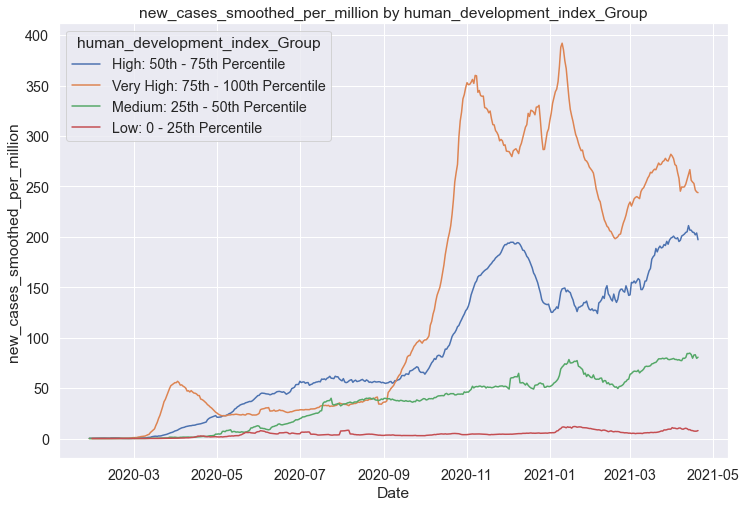

In [21]:
# call and plot function with new_cases_smoothed_per_million as the y-axis and HDI_group as the different lines
group_plot(hdi_df, 'new_cases_smoothed_per_million', 'human_development_index_Group')

This graph shows the average number of new covid cases (smoothed over a 7-day period) based on the Human Development Index (HDI) Group it is in. This shows that the countries with High and Very High HDI measures averaged more new cases per million than Medium and Low HDI countries. Factors that may have led to higher averages could be higher populations in countries of a higher HDI category.

The HDI is a measure of a long life, being educated and the standard of living. The higher the number, the greater the overall development of the country. Each country is split into quantiles that defines what HDI Group level they belong too. The HDI measure was created by the [United Nations Development Programme (UNDP)] (http://hdr.undp.org/en/content/human-development-index-hdi).


In [22]:
df_tourism = pd.read_csv('tourism.csv', names=["Country Name","iso_code","Indicator Name","Indicator Code","1960","1961","1962","1963","1964","1965","1966","1967","1968","1969","1970","1971","1972","1973","1974","1975","1976","1977","1978","1979","1980","1981","1982","1983","1984","1985","1986","1987","1988","1989","1990","1991","1992","1993","1994","1995","1996","1997","1998","1999","2000","2001","2002","2003","2004","2005","2006","2007","2008","2009","2010","2011","2012","2013","2014","2015","2016","2017","2018","2019","2020", "2021"], skiprows=5)
df_tourism_2019 = df_tourism.loc[:, ['iso_code', '2019']].dropna()

df_total_cases_present = df_hc_to_date.loc[:, ['iso_code', 'location', 'total_cases']]

df_tourism_and_total_cases = pd.merge(df_tourism_2019, df_total_cases_present).dropna()

KeyError: "Passing list-likes to .loc or [] with any missing labels is no longer supported. The following labels were missing: Index(['iso_code'], dtype='object'). See https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#deprecate-loc-reindex-listlike"

NameError: name 'df_tourism_and_total_cases' is not defined

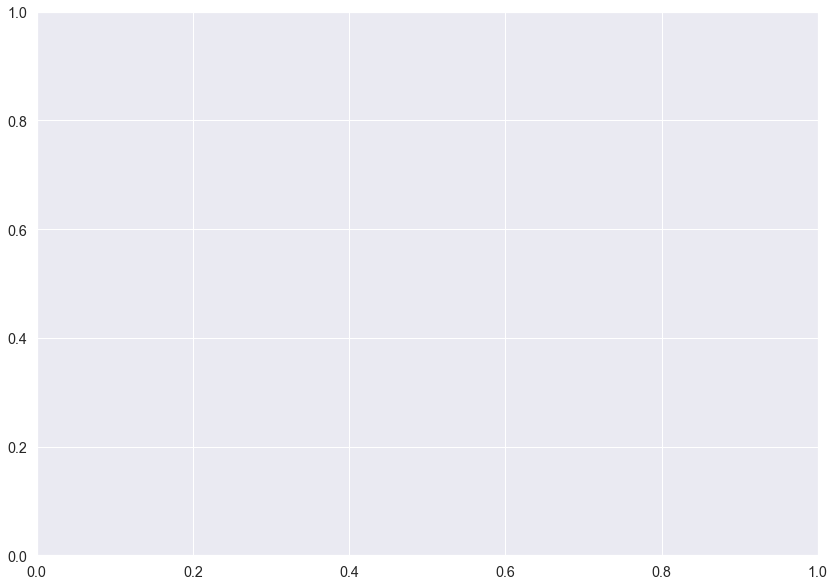

In [23]:
fig, scatter = plt.subplots(figsize = (14,10))
plt.ticklabel_format(style='plain', axis='y')
plt.ticklabel_format(style='plain', axis='x')
tourism_scatter = sns.scatterplot(data=df_tourism_and_total_cases, x='2019', y='total_cases', hue='location', legend=False)
tourism_scatter.set_title('Total Covid Cases vs. Tourism GDP (2019)')
tourism_scatter.set(xlabel='Total Covid Cases', ylabel='Tourism GDP (2019)')

In [24]:
scipy.stats.pearsonr(df_tourism_and_total_cases['2019'], df_tourism_and_total_cases['total_cases'])

NameError: name 'df_tourism_and_total_cases' is not defined

We can see that there is a pretty strong correlation between a country's tourism gdp and total covid cases. However, it is important to note that the tourism gdp was taken from 2019 as there was not a lot of data for 2020 and that some countries did not report their tourism gdp so they were excluded from the data and visualization. There are factors our analysis isn't taking into account such as missing data (how was tourism gdp affected during covid instead of before) and looking at this data over time instead of an aggregate (certain events/country responses could have impacted tourism and covid transmission rates throughout 2020 and 2021 but are shadowed by an aggregate analysis).

# Conclusions